<a href="https://colab.research.google.com/github/KazuhisaHonma/2nd_student_ApplicationDevelopment/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習のいろいろなアルゴリズム

## Lesson12

### 回帰：線形回帰

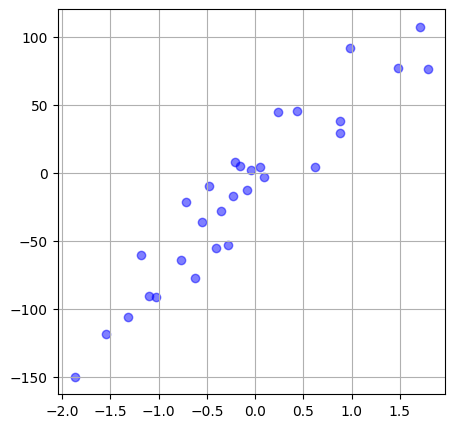

In [ ]:
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ランダム番号3、特徴量は1つ、ノイズ量20、30個のデータセットを作る
X, y = make_regression(
    random_state=3,
    n_features=1,
    noise=20,
    n_samples=30)

# 各列データ(X)で、データフレームを作り
df = pd.DataFrame(X)
# X軸に「特徴量0」、Y軸に「y」で散布図を描画
plt.figure(figsize=(5,5))
plt.scatter(df[0], y, color='b', alpha=0.5)
plt.grid()
plt.show()

正解率: 84.98344774428922 %


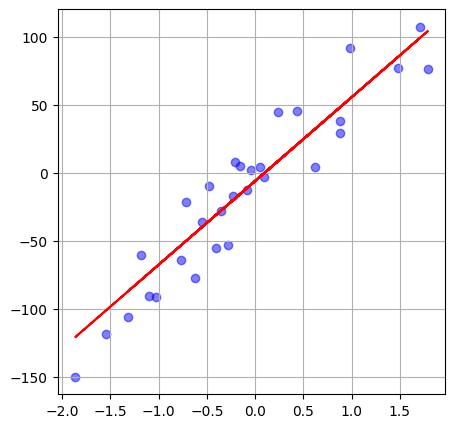

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 線形回帰の学習モデルを作る(訓練データで)
model = LinearRegression()
model.fit(X_train, y_train)

# 正解率を調べる(テストデータで)
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('正解率:', score*100, '%')

# 散布図上に予測の点をたくさん描いて線にする
plt.figure(figsize=(5,5))
plt.scatter(X, y, color='b', alpha=0.5)
plt.plot(X, model.predict(X), color = 'r')
plt.grid()
plt.show()

正解率: 33.025689869605145 %


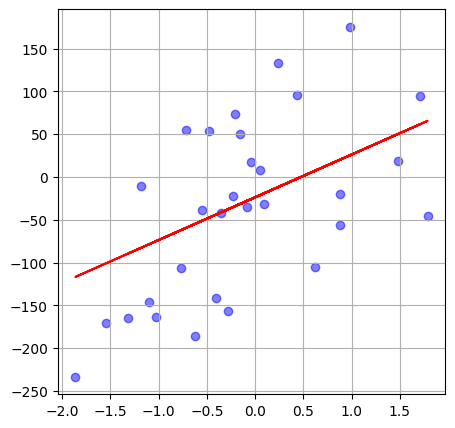

In [ ]:
# ランダム番号3、特徴量は1つ、ノイズ量80、30個のデータセットを作る
X, y = make_regression(
    random_state=3,
    n_features=1,
    noise=80,
    n_samples=30)

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 線形回帰の学習モデルを作る(訓練データで)
model = LinearRegression()
model.fit(X_train, y_train)

# 正解率を調べる(テストデータで)
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('正解率:', score*100, '%')

# 散布図上に予測の点をたくさん描いて線にする
plt.figure(figsize=(5,5))
plt.scatter(X, y, color='b', alpha=0.5)
plt.plot(X, model.predict(X), color = 'r')
plt.grid()
plt.show()

## Lesson13

### 分類：ロジスティック回帰

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 散布図に分類の状態を描画する関数
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # テント塗りのカラーマップ
    cmap_dots = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c'])
    cmap_fills = ListedColormap(['#c6dcec', '#ffdec2', '#cae7ca'])

    plt.figure(figsize=(5,5))
    # モデルがあれば、表示範囲の点をすべて予測して色を塗る
    if model:
        # 表示範囲を少し広げて分割し、調べる点(200x200)を用意する
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # すべての点の値を、モデル予測する
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        # 予測結果の値(0~2)の色(cmap_fills)で塗りつぶす
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading='auto')
        # 境界を灰色で塗る
        plt.contour(XX, YY, pred, colors='gray')
    # targetの値(0~2)の色(cmap_dots)で点を描画する
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [ ]:
from sklearn.datasets import make_blobs

# ランダム番号0、特徴量は2つ、塊数は2、ばらつき1、300個のデータセットを作る
X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=2,
    cluster_std=1,
    n_samples=300)

df = pd.DataFrame(X)
df.head()

,0,1
0,3.359415,5.248267
1,2.931100,0.782556
2,1.120314,5.758061
3,2.876853,0.902956
4,1.666088,5.605634


In [ ]:
y[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

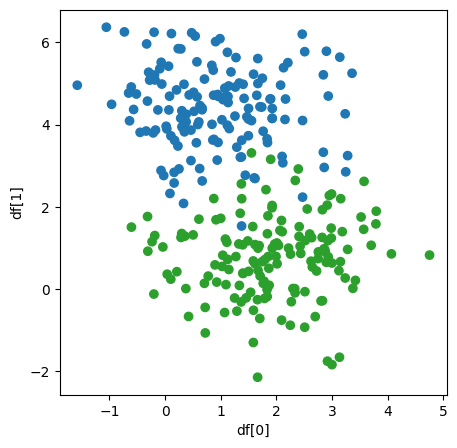

In [ ]:
plot_boundary(None, df[0], df[1], y, 'df[0]', 'df[1]')

正解率: 96.0 %


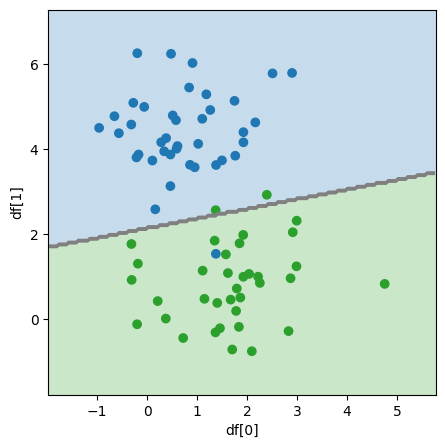

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

正解率: 82.66666666666667 %


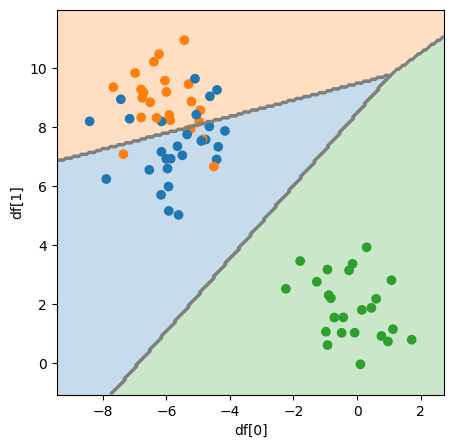

In [ ]:
X, y = make_blobs(
    random_state=5,
    n_features=2,
    centers=3,
    cluster_std=1,
    n_samples=300)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

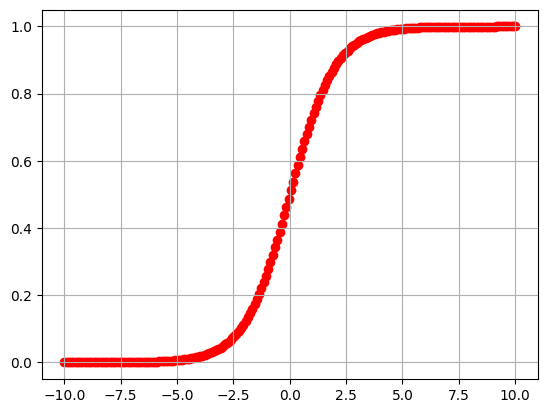

In [ ]:
# xの値(-10~10を200個に分割）
xx = np.linspace(-10,10,200)

# シグモイド関数
yy = 1 / (1 + np.exp(-xx))

plt.scatter(xx, yy, color='r')
plt.grid()
plt.show()

## Lesson14

### 分類：SVM(サポートベクターマシン)

正解率: 89.60000000000001 %


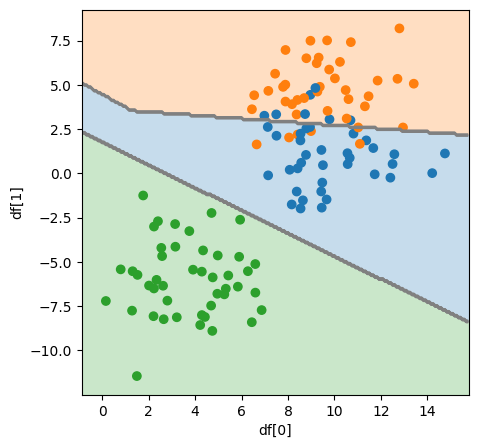

In [ ]:
from sklearn import svm

X, y = make_blobs(
    random_state=4,
    n_features=2,
    centers=3,
    cluster_std=2,
    n_samples=500)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = svm.SVC(kernel='linear') # 線形モデル
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

# この学習モデルの分類の様子を描画する(テストデータで)
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

正解率: 85.6 %


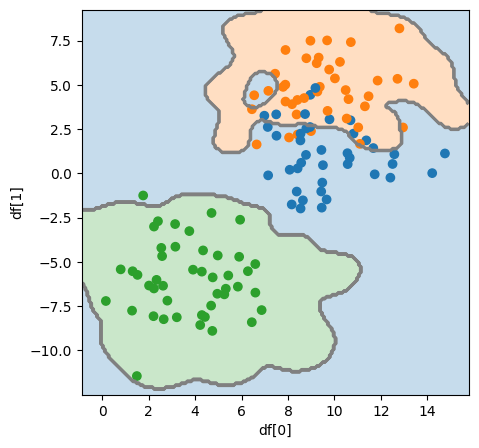

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = svm.SVC(kernel='rbf', gamma=1) # 非線形モデル, gamma1
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

# この学習モデルの分類の様子を描画する(テストデータで)
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

正解率: 72.8 %


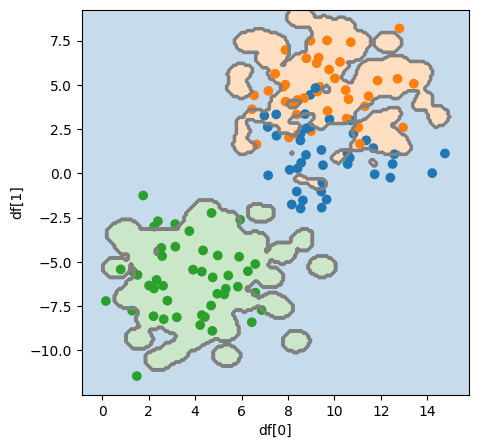

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = svm.SVC(kernel='rbf', gamma=10) # 非線形モデル, gamma10に変更
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

# この学習モデルの分類の様子を描画する(テストデータで)
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

正解率: 89.60000000000001 %


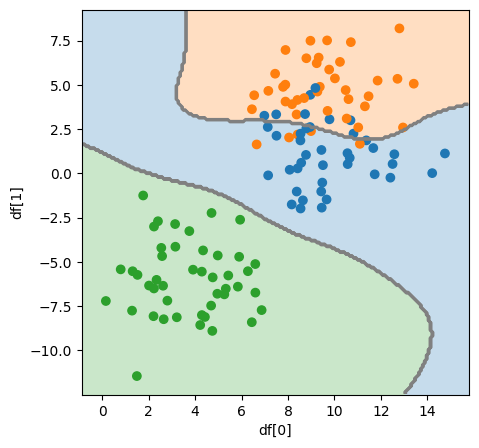

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = svm.SVC(kernel='rbf', gamma=0.1) # 非線形モデル, gamma0.1に変更
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

# この学習モデルの分類の様子を描画する(テストデータで)
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

正解率: 90.4 %


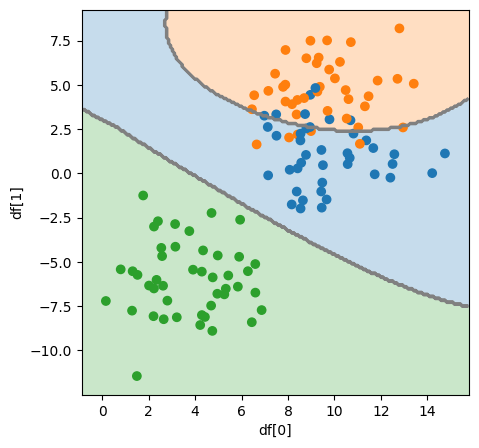

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = svm.SVC(kernel='rbf', gamma='scale') # 非線形モデル, scale modeに変更
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

# この学習モデルの分類の様子を描画する(テストデータで)
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

## Lesson15

### 分類：決定木

正解率: 96.0 %


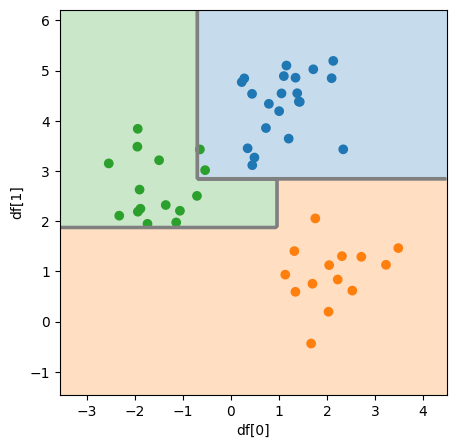

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=3,
    cluster_std=0.6,
    n_samples=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(max_depth=None, random_state=0) # max_depth=None
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

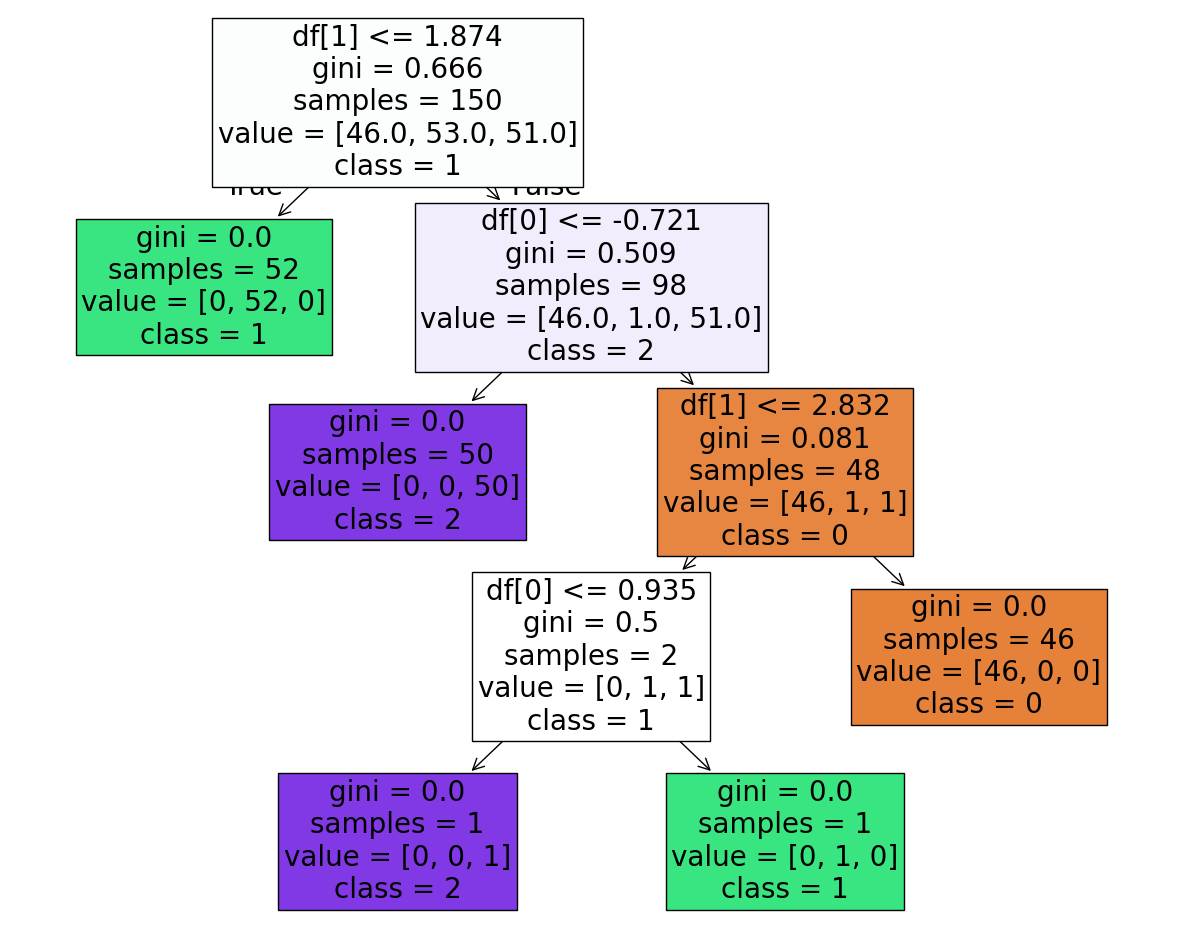

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,12))
plot_tree(model, fontsize=20, filled=True,
feature_names=['df[0]', 'df[1]'],
          class_names=['0','1','2'])
plt.show()

正解率: 92.0 %


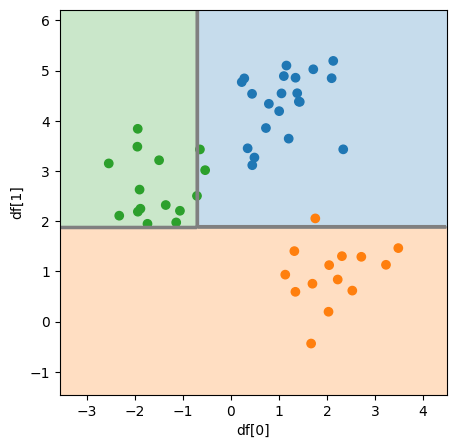

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2, random_state=0) # max_depth=2
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

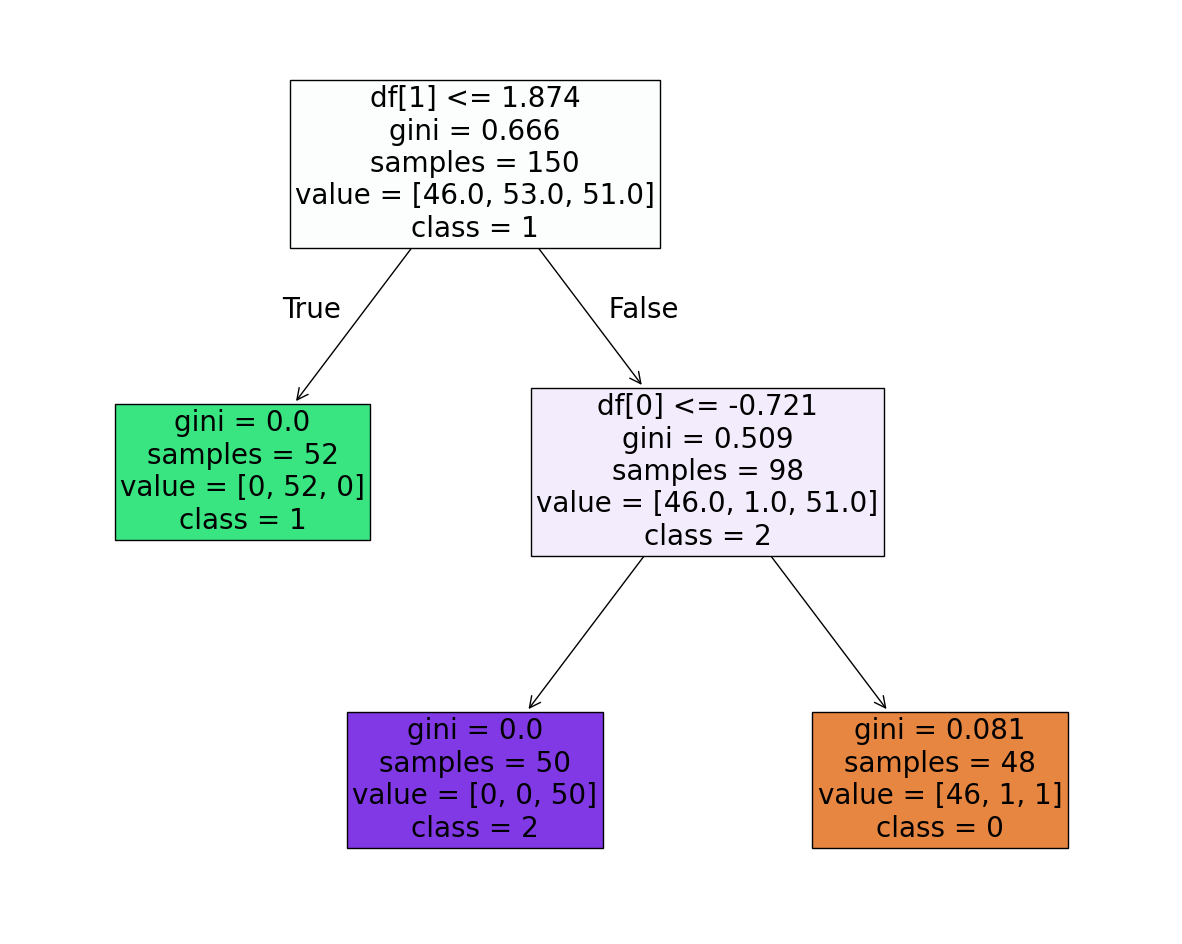

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,12))
plot_tree(model, fontsize=20, filled=True,
feature_names=['df[0]', 'df[1]'],
          class_names=['0','1','2'])
plt.show()

## Lesson16

### 分類：ランダムフォレスト

正解率: 100.0 %


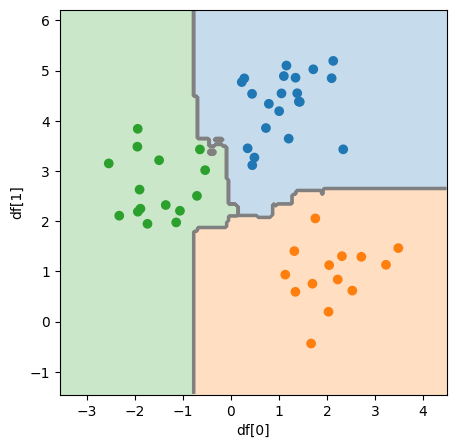

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

## Lesson17

### 分類：k-NN(k近傍法)

正解率: 100.0 %


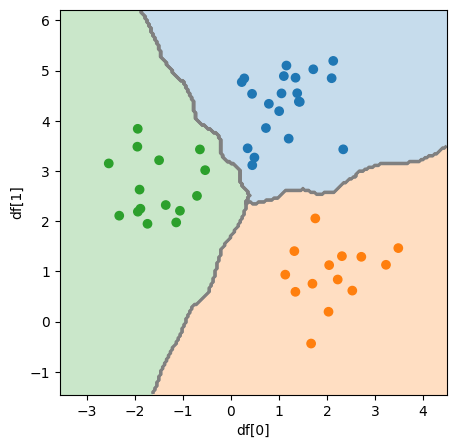

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print('正解率:', score*100, '%')

df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, 'df[0]', 'df[1]')

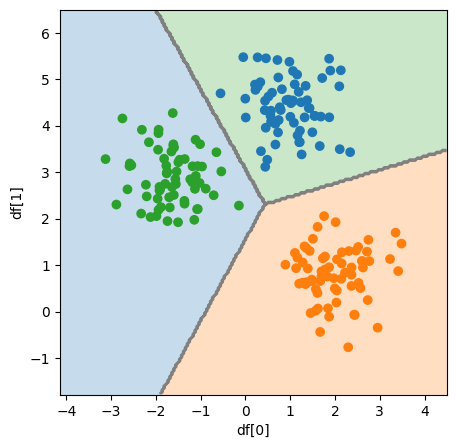

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

df = pd.DataFrame(X)
plot_boundary(model, df[0], df[1], y, 'df[0]', 'df[1]')

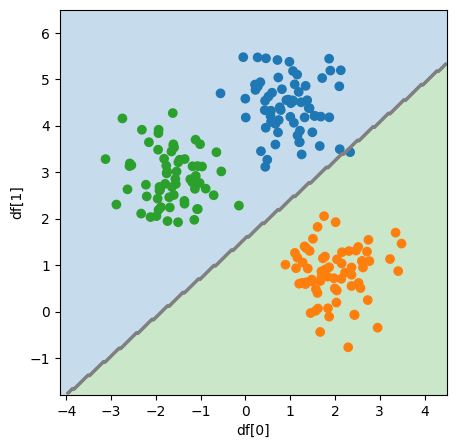

In [ ]:
model = KMeans(n_clusters=2)
model.fit(X)

df = pd.DataFrame(X)
plot_boundary(model, df[0], df[1], y, 'df[0]', 'df[1]')